# Vietnamese Article Entity Analysis
This notebook analyzes the Named Entities extracted from the dataset.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import networkx as nx
from collections import Counter

%matplotlib inline
sns.set_theme(style="whitegrid")

## 1. Load Data

In [14]:
# Load CSV report
try:
    df = pd.read_csv('entities_report.csv', index_col='Rank')
    print("Loaded entities_report.csv")
    display(df.head(10))
except FileNotFoundError:
    print("entities_report.csv not found. Run export_data.py first.")

Loaded entities_report.csv


,Entity,Frequency,Num_Articles
Rank,,,
1,Việt Nam,35493,8850
2,Mỹ,17105,4272
3,Hà Nội,11735,5042
4,Trung Quốc,10056,2882
5,Nga,6409,1042
6,TP. HCM,5668,2169
7,Hồ Chí Minh,4711,921
8,TP HCM,4060,1623
9,Ukraine,4011,572


## 2. Top Frequent Entities Distribution

/var/folders/3n/vb_x0dyx2yj9ncd3fh8vy8rw0000gn/T/ipykernel_11259/228066310.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Entity', data=top_20, palette='viridis')


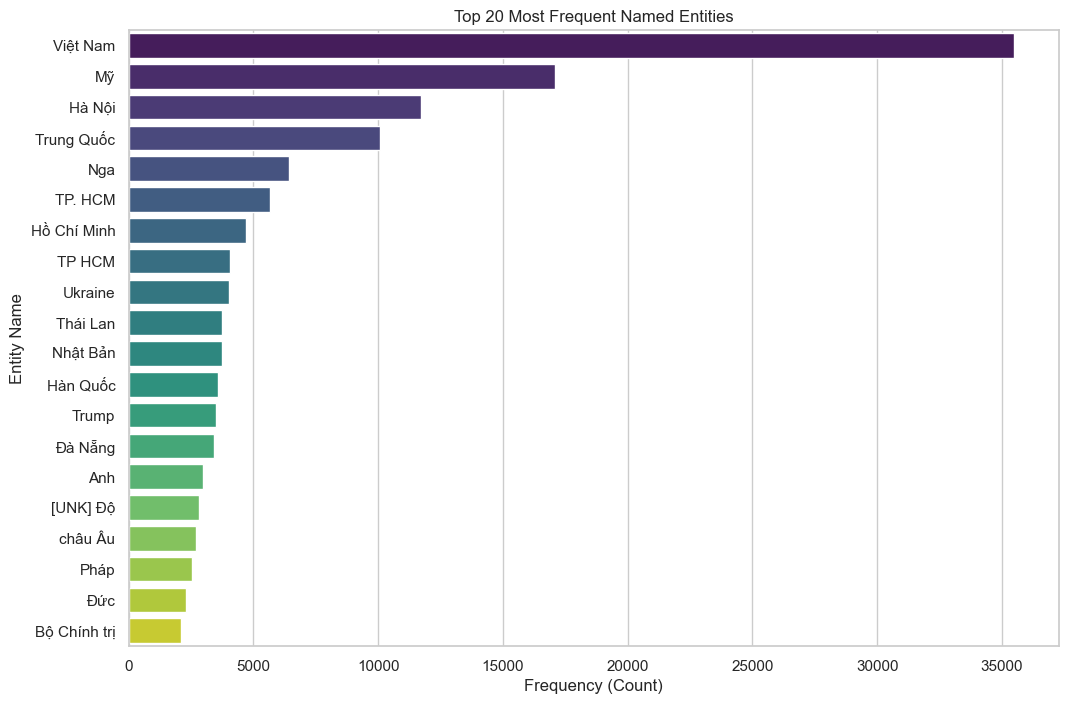

In [15]:
plt.figure(figsize=(12, 8))
top_20 = df.head(20)
sns.barplot(x='Frequency', y='Entity', data=top_20, palette='viridis')
plt.title('Top 20 Most Frequent Named Entities')
plt.xlabel('Frequency (Count)')
plt.ylabel('Entity Name')
plt.show()

## 3. Co-occurrence Network Graph
Visualizing relationships between the most connected entities.

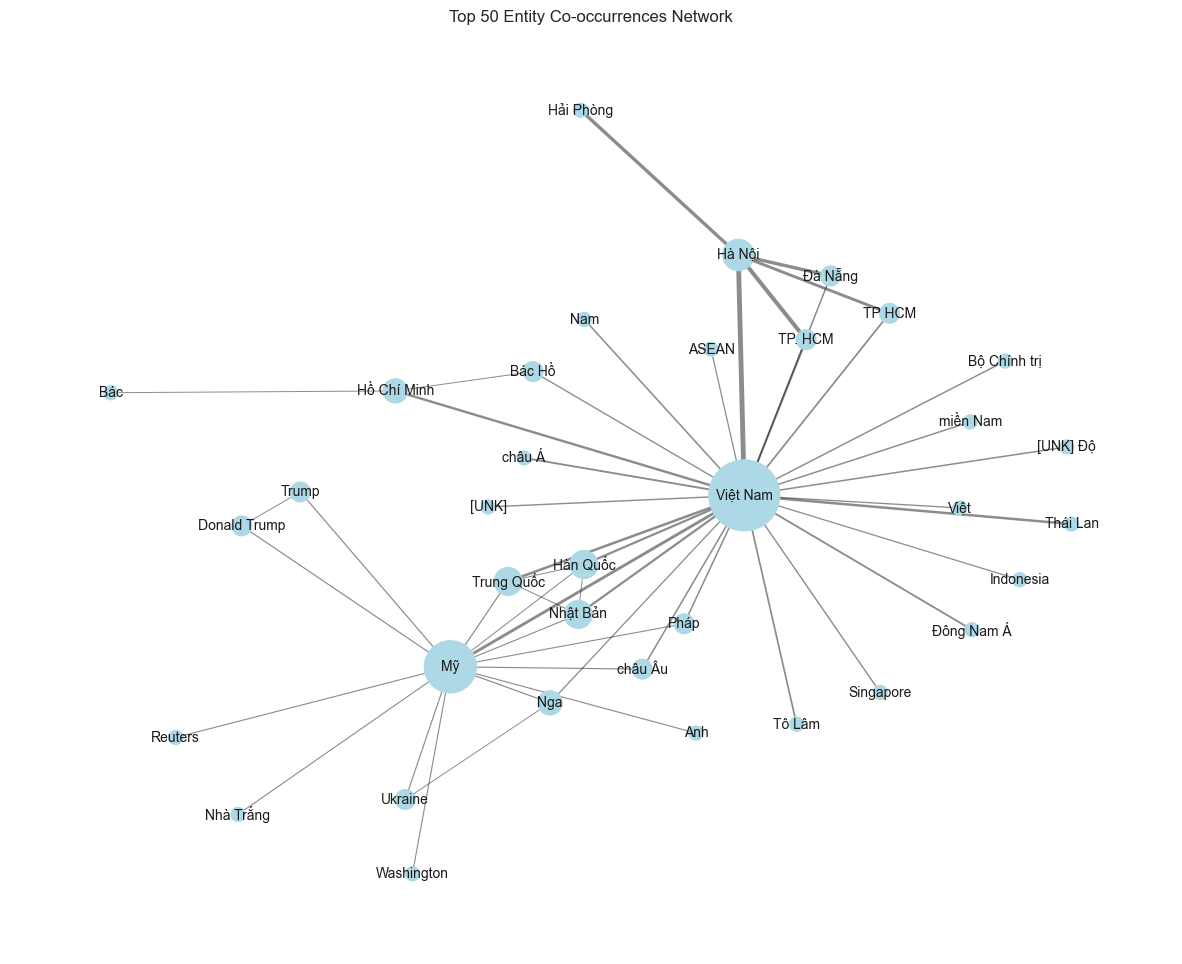

In [16]:
# Load Co-occurrence data
try:
    edges_df = pd.read_csv('co_occurrence.csv')
    # Take top 50 strongest connections for visualization clarity
    top_edges = edges_df.head(50)
    
    G = nx.from_pandas_edgelist(top_edges, 'Source', 'Target', 'Weight')
    
    plt.figure(figsize=(15, 12))
    pos = nx.spring_layout(G, k=0.5, seed=42)
    
    # Node size based on degree
    d = dict(G.degree)
    node_sizes = [v * 100 for v in d.values()]
    
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='lightblue')
    nx.draw_networkx_edges(G, pos, width=[w/500 for w in top_edges['Weight']], alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
    
    plt.title('Top 50 Entity Co-occurrences Network')
    plt.axis('off')
    plt.show()
except FileNotFoundError:
    print("co_occurrence.csv not found.")